**Sandeep Maheshwari YouTube Channel Analysis**

- In this project, we will be conducting a comprehensive analysis of Sandeep Maheshwari's YouTube channel.
- Sandeep Maheshwari is a prominent motivational speaker and entrepreneur, and his YouTube channel hosts a variety of videos aimed at inspiring and motivating individuals to achieve their goals and lead a fulfilling life.

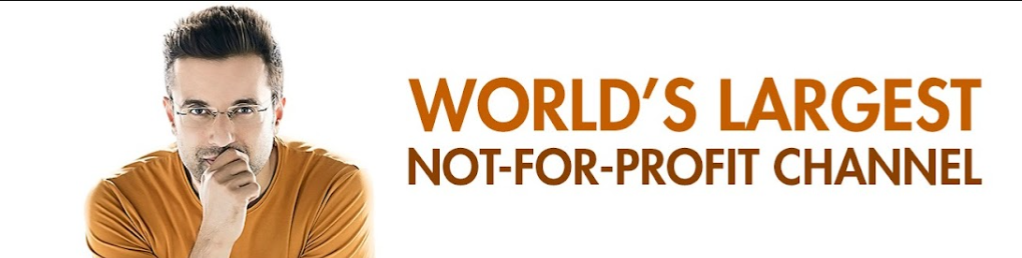

In [15]:
from IPython.display import Image, display
image_path = '/content/sm.png'
display(Image(filename=image_path))


In [16]:
# importing required libarires

import numpy as np
import pandas as pd
import re

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#NLP
from wordcloud import WordCloud

In [17]:
#importing dataset

df = pd.read_csv("/content/SandeepMaheshwari_Youtube_Channel_Stats.csv")

df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,JblNzdZ_7pw,Sandeep Maheshwari,The Future of Technology Ft. Anshuman Singh | ...,Sandeep Maheshwari is a name among millions wh...,"['Tech', 'Technology', 'Ai', 'Ml', 'Machine le...",2023-08-05T10:13:19Z,504830,29124,0,1917,PT20M32S,hd,False
1,YnSOzCKs7Pw,Sandeep Maheshwari,Biggest Parenting Mistake | Sandeep Maheshwari...,Sandeep Maheshwari is a name among millions wh...,"['Parent', 'Parents', 'Parenting', 'Career', '...",2023-08-03T09:05:51Z,762563,48387,0,3122,PT13M40S,hd,False
2,mKXdArLUDL0,Sandeep Maheshwari,Mahabharat Ft. Ami Ganatra | Sandeep Maheshwar...,Sandeep Maheshwari is a name among millions wh...,"['Mahabharat', 'Bharat', 'Krishna', 'Law of ka...",2023-07-26T10:20:29Z,1455613,76244,0,5348,PT27M24S,hd,False
3,wCac1kyhdqg,Sandeep Maheshwari,Real History of India Ft. Abhijit Chavda | San...,YouTube Channel: https://www.youtube.com/@Abhi...,"['Positive', 'Thinking', 'thoughts', 'best', '...",2023-07-19T14:30:08Z,854295,50722,0,4962,PT28M1S,hd,False
4,7tlJRhEu8Bc,Sandeep Maheshwari,Artificial Intelligence Ft. Divij Bajaj | Sand...,Sandeep Maheshwari is a name among millions wh...,"['Positive', 'Thinking', 'thoughts', 'best', '...",2023-07-17T11:06:01Z,1098555,51759,0,3275,PT36M27S,hd,False


#  **Data Pre-processing**

In [18]:
# total records and columns

df.shape

(589, 13)

In [19]:
#checking for missing values

df.isnull().sum()

video_id         0
channelTitle     0
title            0
description      4
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [20]:
# checking for duplicated values

df.duplicated().sum()

0

In [21]:
# summary of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       589 non-null    object
 1   channelTitle   589 non-null    object
 2   title          589 non-null    object
 3   description    585 non-null    object
 4   tags           589 non-null    object
 5   publishedAt    589 non-null    object
 6   viewCount      589 non-null    int64 
 7   likeCount      589 non-null    int64 
 8   favoriteCount  589 non-null    int64 
 9   commentCount   589 non-null    int64 
 10  duration       589 non-null    object
 11  definition     589 non-null    object
 12  caption        589 non-null    bool  
dtypes: bool(1), int64(4), object(8)
memory usage: 55.9+ KB


In [22]:
#statistical summary

df.describe()

,viewCount,likeCount,favoriteCount,commentCount
count,5.890000e+02,5.890000e+02,589.0,589.000000
mean,3.944917e+06,1.690015e+05,0.0,6574.404075
std,5.534482e+06,1.934018e+05,0.0,7997.811047
min,2.815450e+05,7.055000e+03,0.0,235.000000
25%,1.083248e+06,5.230400e+04,0.0,2546.000000
50%,2.112293e+06,1.003060e+05,0.0,4442.000000
75%,4.807192e+06,2.013770e+05,0.0,7464.000000
max,6.735387e+07,1.620214e+06,0.0,99053.000000


In [23]:
# changing the datatype of publishedAt column

df["publishedAt"] = pd.to_datetime(df["publishedAt"])

# **Creating New Columns**

In [24]:
# Creating a new column for the date values (upload_date)

df['upload_date'] = df['publishedAt'].dt.date

In [25]:
# video upload time

df['upload_time'] = df['publishedAt'].dt.time

In [26]:
df['upload_date']= pd.to_datetime(df["upload_date"])

In [27]:
# video_uploaded year

df['upload_year'] = df['upload_date'].dt.year

In [28]:
# Extracting day of the week

df['day_of_week'] = df['publishedAt'].dt.day_name()

In [29]:
df[['upload_year','upload_date','upload_time','day_of_week']].head()

,upload_year,upload_date,upload_time,day_of_week
0,2023,2023-08-05,10:13:19,Saturday
1,2023,2023-08-03,09:05:51,Thursday
2,2023,2023-07-26,10:20:29,Wednesday
3,2023,2023-07-19,14:30:08,Wednesday
4,2023,2023-07-17,11:06:01,Monday


In [34]:
!pip install isodate



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.2 MB/s eta 0:00:00


In [36]:
# converting duration of videos to seconds

from isodate import parse_duration

df['duration_seconds'] = df['duration'].apply(lambda x: parse_duration(x))

df['duration_seconds'] = df['duration_seconds'].astype("timedelta64[s]") # changing datatype

In [37]:
df[["duration",'duration_seconds']].head()

,duration,duration_seconds
0,PT20M32S,1232.0
1,PT13M40S,820.0
2,PT27M24S,1644.0
3,PT28M1S,1681.0
4,PT36M27S,2187.0


# **EDA (Explorartory Data Analysis)**

# **Q) Best Performing videos of the channel that are having high engegament of views ?**

Conclusion :

- Top performing video is "World's Most Viewed Life Changing Video By Sandeep Maheshwari | Hindi"

 with a viewcount of '67.353869' million.



In [38]:
sns.set(style='dark')

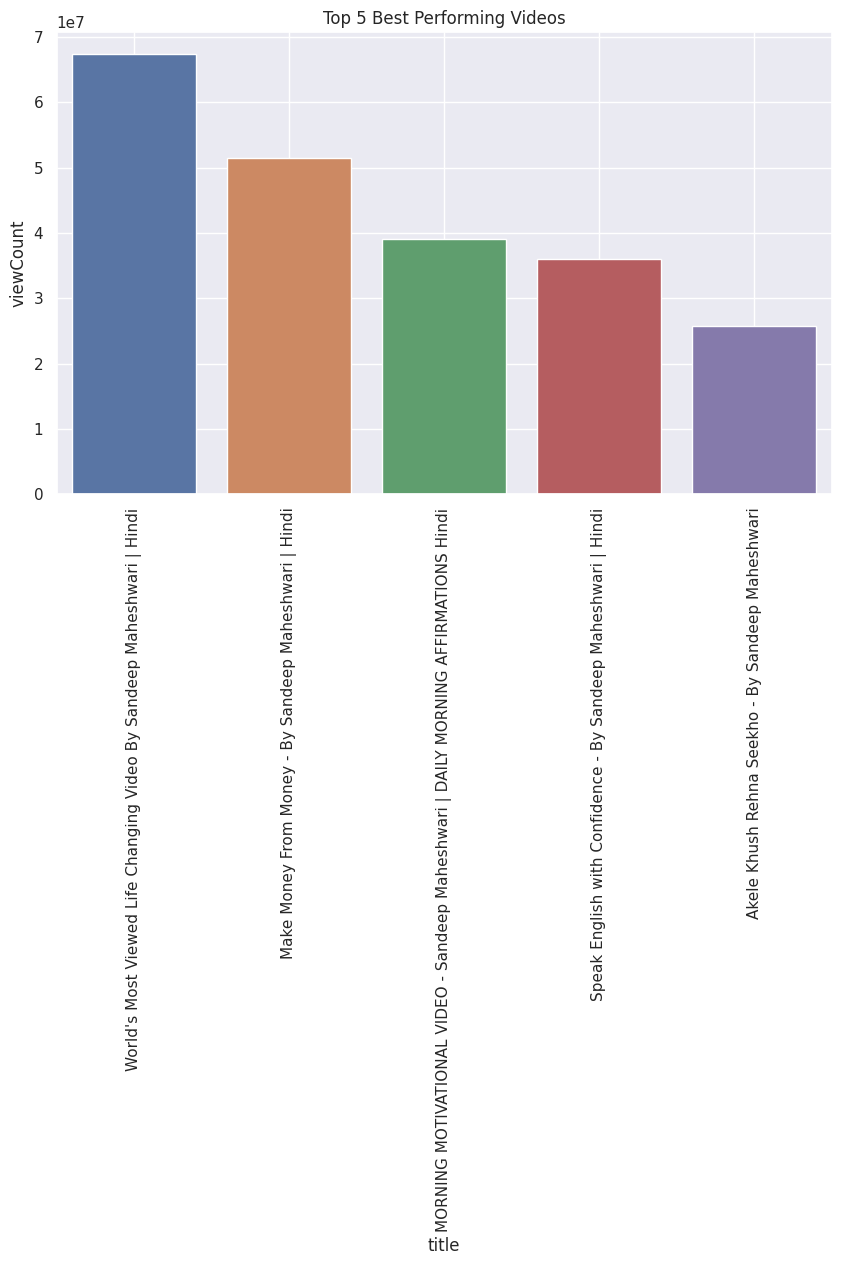

In [39]:
top_5 = df[["title","viewCount"]].sort_values("viewCount", ascending = False).head(5)

# Creating a bar plot using Seaborn

plt.figure(figsize=(10, 6))

sns.barplot(x='title', y='viewCount', data= top_5)

plt.title('Top 5 Best Performing Videos')
plt.xticks(rotation=90)
plt.grid()

plt.show()

# **Q) How is the distribution of views per video?**

In conclusion,

- we observe that the maximum outlier in view count reaches an impressive 67.35 million views.

- while the minimum view count stands at 281,000 views.

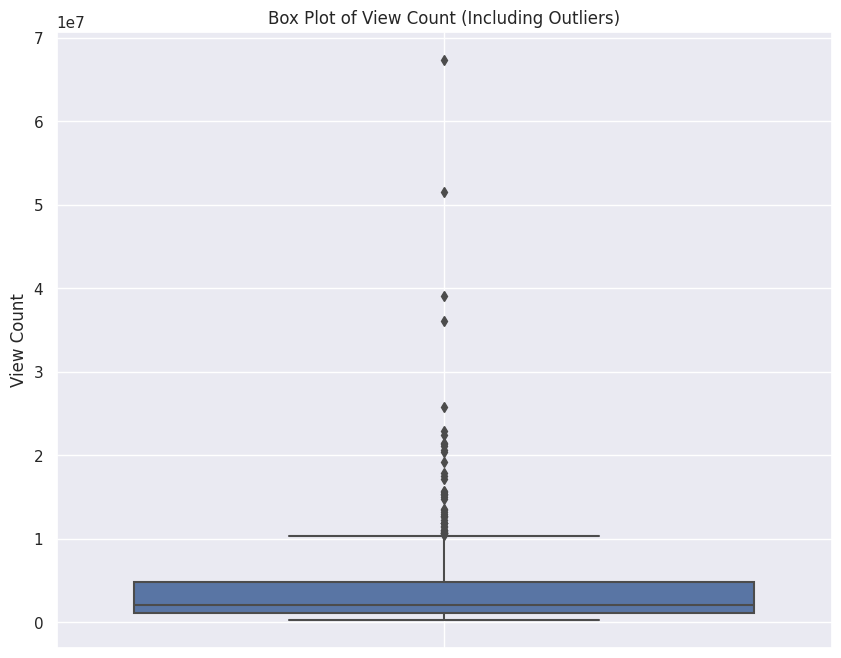

In [65]:
# using box plot

plt.figure(figsize=(10, 8))

sns.boxplot(data=df, y='viewCount')
plt.title('Box Plot of View Count (Including Outliers)')
plt.ylabel('View Count')
plt.grid()

plt.show()

# **Q) What are the Video Durations?**

Conclusion

- Upon analysis, it becomes evident that the majority of video durations fall within the range of 1,200 to 1,500 seconds, approximately equivalent to around 22 minutes.

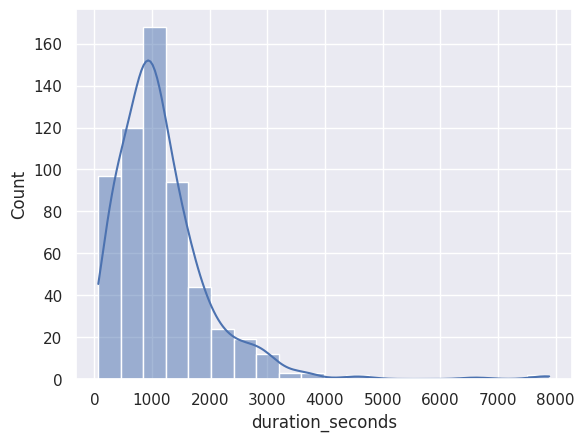

In [41]:
# using histogram with kde plot

sns.histplot(data=df, x='duration_seconds', bins=20 , kde = True)

plt.grid()

# **Q) What is the Most Frequent Word Used in Titles?**

Conclusion:

- we can observe that certain words consistently dominate the content's titles. Notably, words like "Maheshwari," "Video," "Sandeep," "Episode," and "Hindi" emerge as the most common words.

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

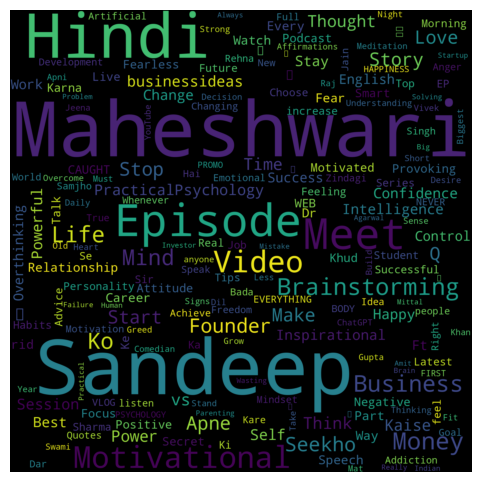

In [67]:
from nltk.corpus import stopwords

# Removing stopwords from titles
stop_words = set(stopwords.words("english"))
df["title_no_stopwords"] = df["title"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Combining all titles into a single string
all_words_str = ' '.join(df["title_no_stopwords"].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=1800, height=1800, random_state=1, collocations=False).generate(all_words_str)

# Define a function to plot the word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_cloud(wordcloud)

#**Q) How Many Videos Were Uploaded on Each Day of the Week?**

Conclusions:

- The highest number of video uploads occurred on Wednesday, totaling 148 videos.
- In contrast, Sunday witnessed the lowest number of video uploads, with only 4 videos added on that day.

In [44]:
day_counts = df['day_of_week'].value_counts()

day_counts

Wednesday    148
Thursday     119
Saturday      88
Friday        82
Tuesday       78
Monday        70
Sunday         4
Name: day_of_week, dtype: int64

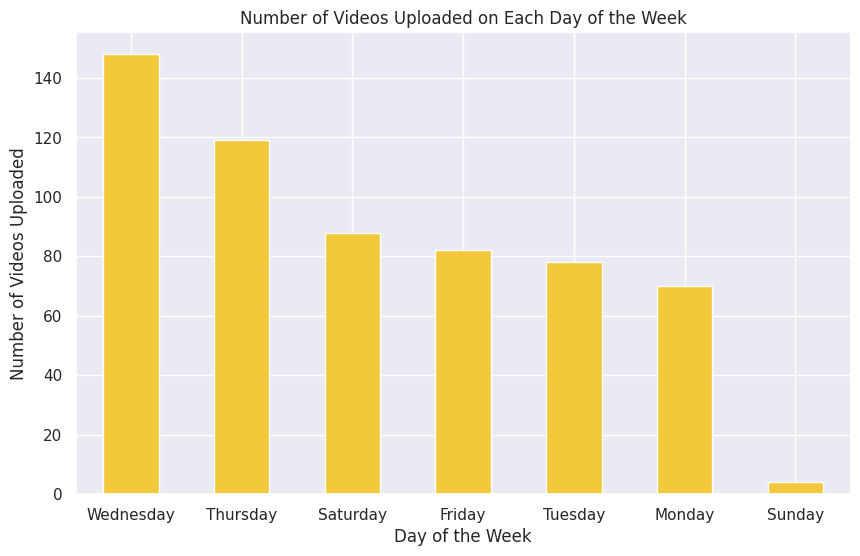

In [45]:
# plotting a bar chart

plt.figure(figsize=(10, 6))

day_counts.plot(kind='bar', color='#F1C93B')

# Adding axis labels and a title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Uploaded')
plt.title('Number of Videos Uploaded on Each Day of the Week')
plt.xticks(rotation=0)

plt.grid()
# Show the plot
plt.show()

#**Q) Extracting the year, avg_view, avg_like, avg_comment ?**

In [60]:
year_metrics = df.groupby('upload_year').agg(
                number_of_videos=('publishedAt', 'size'),
                avg_view=('viewCount', 'mean'),
                avg_like=('likeCount', 'mean'),
                avg_comment=('commentCount', 'mean')
                ).reset_index()

year_metrics

,upload_year,number_of_videos,avg_view,avg_like,avg_comment
0,2012,2,3.760763e+07,570105.000000,26145.500000
1,2013,10,4.020106e+06,102139.400000,3569.200000
2,2014,5,4.540274e+06,103272.600000,3744.000000
3,2015,17,4.811741e+06,126729.352941,4143.941176
4,2016,29,5.457973e+06,145242.793103,3944.275862
5,2017,70,3.742708e+06,119190.114286,3706.742857
6,2018,49,6.033629e+06,227972.897959,7606.551020
7,2019,51,7.235250e+06,282386.921569,9210.686275
8,2020,86,4.216299e+06,215511.383721,8818.267442
9,2021,105,1.617589e+06,80118.990476,4153.457143


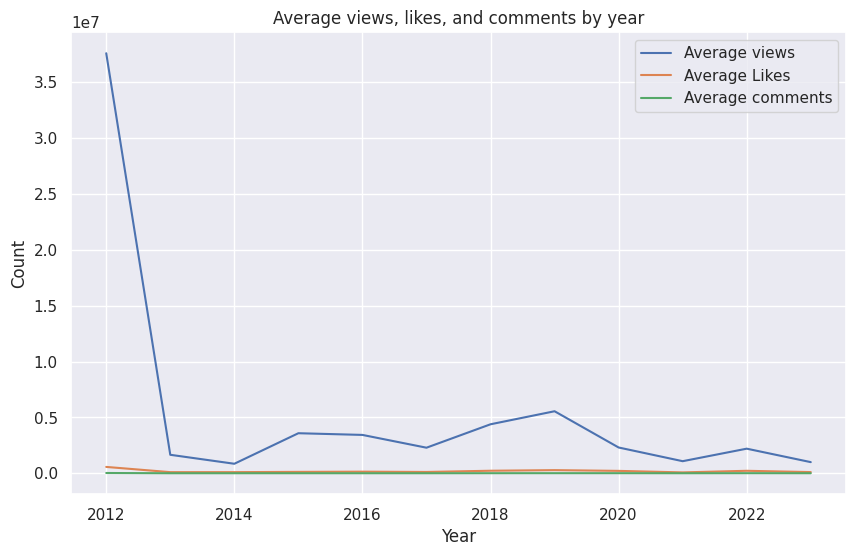

In [59]:
plt.figure(figsize=(10,6))

# Plotting the average views, likes, and comments on the same graph

plt.plot(year_metrics["upload_year"] , year_metrics["avg_view"]  , label = "Average views")
plt.plot(year_metrics["upload_year"] , year_metrics["avg_like"], label = "Average Likes")
plt.plot(year_metrics["upload_year"] , year_metrics["avg_comment"], label = "Average comments")

# Adding axis labels and a title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Average views, likes, and comments by year')

# Add a legend
plt.legend()
plt.grid()

# Show the plot
plt.show()

# **Q) When are the Majority of Videos Uploaded?**

Conclusion

- In morning total 445 videos were uploaded.
- Afternoon    132 videos.
- Night         10 videos.
- Evening        2 videos.

In [48]:
# Categorize the times into different slots (e.g., morning, afternoon, evening, night)

def categorize_time(upload_time):
    if 5 <= upload_time.hour < 12:
        return 'Morning'
    elif 12 <= upload_time.hour < 17:
        return 'Afternoon'
    elif 17 <= upload_time.hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_slot'] = df['upload_time'].apply(categorize_time)

In [49]:
# Count the number of videos uploaded in each time slot

time_slot_counts = df['time_slot'].value_counts()
time_slot_counts

Morning      445
Afternoon    132
Night         10
Evening        2
Name: time_slot, dtype: int64

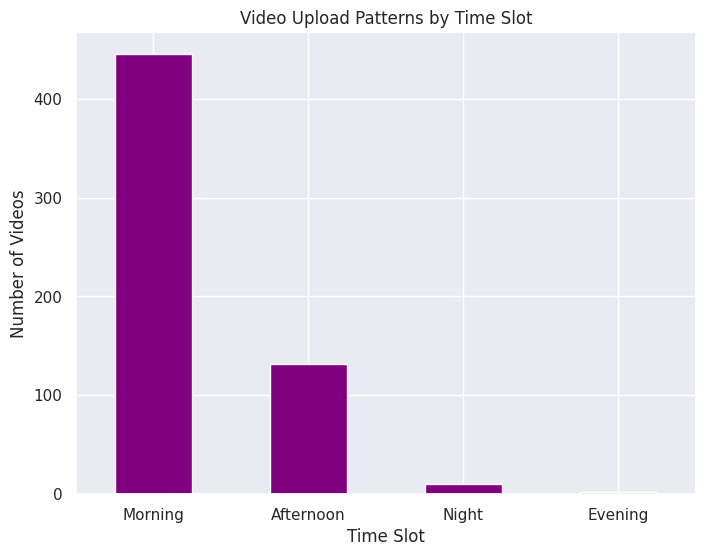

In [50]:
# Create a bar plot
plt.figure(figsize=(8, 6))

time_slot_counts.plot(kind='bar', color='purple')

# Adding axis labels and a title
plt.xlabel('Time Slot')
plt.ylabel('Number of Videos')
plt.title('Video Upload Patterns by Time Slot')
plt.xticks(rotation=0)

plt.grid()
plt.show()

# **Q) Investigating the Correlation between Likes and Views for Videos**

Conclusion:

- The value of 0.8516 is relatively close to +1, which indicates a strong positive correlation. This implies that videos with higher view counts are more likely to receive a greater number of likes, and vice versa

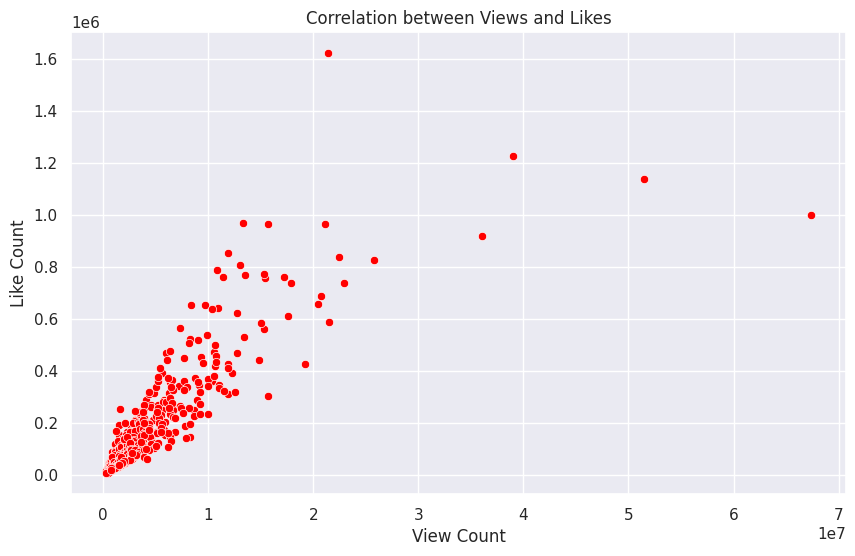

In [51]:
#plotting the scatter plot

plt.figure(figsize=(10, 6))

sns.scatterplot(x=df["viewCount"], y=df["likeCount"] , color = "red")

# Adding axis labels and a title
plt.title('Correlation between Views and Likes')
plt.xlabel('View Count')
plt.ylabel('Like Count')

plt.grid()
plt.show()

In [52]:
# Calculate the correlation coefficient

df['viewCount'].corr(df['likeCount'])

0.8516026052046506

# **Q) Distribution of Views, Likes, and Comments among Videos**

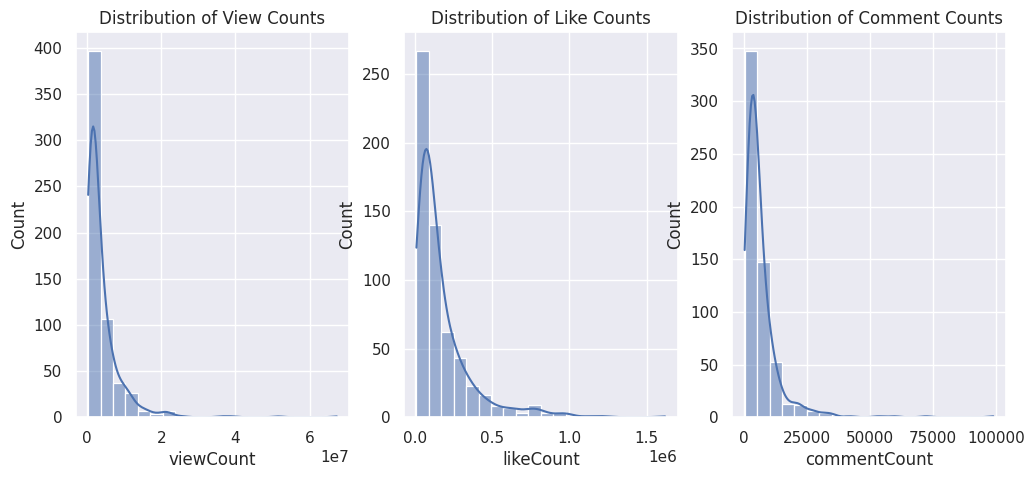

In [53]:
# Plotting histograms for viewCount, likeCount, and commentCount using subplots

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['viewCount'], bins=20, kde=True)
plt.title('Distribution of View Counts')
plt.grid()

plt.subplot(1, 3, 2)
sns.histplot(df['likeCount'], bins=20, kde=True)
plt.title('Distribution of Like Counts')
plt.grid()

plt.subplot(1, 3, 3)
sns.histplot(df['commentCount'], bins=20, kde=True)
plt.title('Distribution of Comment Counts')

plt.grid()
plt.show()

# **Basic Channel stats**

**Q1) First video and uploaded on**

In [54]:
df[["title","publishedAt"]].sort_values("publishedAt").head(1)

,title,publishedAt
588,FIRST Life Changing Seminar - By Sandeep Mahes...,2012-05-24 14:27:58+00:00


**Q2) Most viewed video**

In [55]:
df[["title","viewCount"]].sort_values("viewCount", ascending = False).head(1)

,title,viewCount
587,World's Most Viewed Life Changing Video By San...,67353869


**Q3) Most liked video**

In [56]:
df[["title","likeCount"]].sort_values("likeCount", ascending = False).head(1)

,title,likeCount
108,Meet Khan Sir | Episode 29,1620214


**Q4) Most commented video**

In [57]:
df[["title","commentCount"]].sort_values("commentCount", ascending = False).head(1)

,title,commentCount
108,Meet Khan Sir | Episode 29,99053
